<a href="https://colab.research.google.com/github/rlaalswn222/forest/blob/main/forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

data_2016 = pd.read_csv('/content/drive/MyDrive/forest/병해충발생정보관리_2016.csv', encoding='cp949')
data_2017 = pd.read_csv('/content/drive/MyDrive/forest/병해충발생정보관리_2017.csv', encoding='cp949')
data_2018 = pd.read_csv('/content/drive/MyDrive/forest/병해충발생정보관리_2018.csv', encoding='cp949')
data_2019 = pd.read_csv('/content/drive/MyDrive/forest/병해충발생정보관리_2019.csv', encoding='cp949')
data_2020 = pd.read_csv('/content/drive/MyDrive/forest/병해충발생정보관리_2020.csv', encoding='cp949')
data_2021 = pd.read_csv('/content/drive/MyDrive/forest/병해충발생정보관리_2021.csv', encoding='cp949')
data_2022 = pd.read_csv('/content/drive/MyDrive/forest/병해충발생정보관리_2022.csv', encoding='cp949')
data_2023 = pd.read_csv('/content/drive/MyDrive/forest/병해충발생정보관리_2023.csv', encoding='cp949')

<ipython-input-2-bf3bccb44f3c>:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2016 = pd.read_csv('/content/drive/MyDrive/forest/병해충발생정보관리_2016.csv', encoding='cp949')
<ipython-input-2-bf3bccb44f3c>:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2017 = pd.read_csv('/content/drive/MyDrive/forest/병해충발생정보관리_2017.csv', encoding='cp949')
<ipython-input-2-bf3bccb44f3c>:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2018 = pd.read_csv('/content/drive/MyDrive/forest/병해충발생정보관리_2018.csv', encoding='cp949')
<ipython-input-2-bf3bccb44f3c>:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2019 = pd.read_csv('/content/drive/MyDrive/forest/병해충발생정보관리_2019.csv', encoding='cp949')
<ipython-input-2-bf

In [ ]:
data_2016.head()

,발생관리기관코드,지역X좌표,지역Y좌표,국가지점번호,토지관리번호(PNU코드),발생경급수치,고사목구분,감염목구분,조사일자,방제완료여부
0,5420000,324004,274227,라라78357385,4882040000000000000,38,피해고사목,감염목,2016-01-05,완료
1,5420000,324014,274232,라라78367385,4882040000000000000,36,피해고사목,감염목,2016-01-05,완료
2,5420000,324051,274272,라라78407389,4882040000000000000,30,피해고사목,감염목,2016-01-05,완료
3,5420000,323980,274182,라라78337380,4882040000000000000,28,피해고사목,감염목,2016-01-05,완료
4,5420000,323994,274182,라라78347380,4882040000000000000,36,피해고사목,감염목,2016-01-05,완료


In [ ]:
# 감염목구분 요소 확인
unique_2016_ox = data_2016['감염목구분'].unique()
# 고유 값 출력
print(f"감염목구분 열의 고유 값들 (중복 제거): {unique_2016_ox}")

감염목구분 열의 고유 값들 (중복 제거): ['감염목' '미감염']


In [ ]:
# '감염목구분' 열에서 '감염' 값의 비율 계산
infection_rat_2016 = data_2016['감염목구분'].value_counts(normalize=True)['감염목'] * 100

print(f"전체 중 감염된 소나무 비율: {infection_rat_2016:.2f}%")


전체 중 감염된 소나무 비율: 38.06%


In [ ]:
data_2017.head()



,발생관리기관코드,지역X좌표,지역Y좌표,국가지점번호,토지관리번호(PNU코드),발생경급수치,고사목구분,감염목구분,조사일자,방제완료여부
0,1400457,391799,390248,마마46708946,4711334036,20,피해고사목,감염목,2017-01-01,완료
1,1400457,391251,390826,마마46159004,4711334036,28,기타고사목,미감염,2017-01-01,완료
2,1400457,390892,390344,마마45798956,4711334036,34,피해고사목,감염목,2017-01-01,완료
3,1400457,390904,390338,마마45808955,4711334036,34,피해고사목,감염목,2017-01-01,완료
4,1400457,389892,390918,마마44809014,4711334036,18,기타고사목,미감염,2017-01-01,완료


In [ ]:
#2017년에 좀 높음
infection_rat_2017 = data_2017['감염목구분'].value_counts(normalize=True)['감염목'] * 100

print(f"전체 중 감염된 소나무 비율: {infection_rat_2017:.2f}%")

전체 중 감염된 소나무 비율: 23.27%


In [ ]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   발생관리기관코드       1048575 non-null  object 
 1   지역X좌표          1048575 non-null  int64  
 2   지역Y좌표          1048575 non-null  int64  
 3   국가지점번호         1048575 non-null  object 
 4   토지관리번호(PNU코드)  1048573 non-null  float64
 5   발생경급수치         1048575 non-null  int64  
 6   고사목구분          1048575 non-null  object 
 7   감염목구분          1048575 non-null  object 
 8   조사일자           1048575 non-null  object 
 9   방제완료여부         1048575 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 80.0+ MB


In [ ]:
# '감염목구분' 열에서 '감염' 값의 비율 계산
infection_rat_2018 = data_2018['감염목구분'].value_counts(normalize=True)['감염목'] * 100

print(f"전체 중 감염된 소나무 비율: {infection_rat_2018:.2f}%")

전체 중 감염된 소나무 비율: 30.47%


In [ ]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   발생관리기관코드       1048575 non-null  object
 1   지역X좌표          1048575 non-null  int64 
 2   지역Y좌표          1048575 non-null  int64 
 3   국가지점번호         1048575 non-null  object
 4   토지관리번호(PNU코드)  1048575 non-null  int64 
 5   발생경급수치         1048575 non-null  int64 
 6   고사목구분          1048575 non-null  object
 7   감염목구분          1048575 non-null  object
 8   조사일자           1048575 non-null  object
 9   방제완료여부         1048575 non-null  object
dtypes: int64(4), object(6)
memory usage: 80.0+ MB


In [ ]:
# '2019년도 높은 편
infection_rat_2019 = data_2019['감염목구분'].value_counts(normalize=True)['감염목'] * 100

print(f"전체 중 감염된 소나무 비율: {infection_rat_2019:.2f}%")

전체 중 감염된 소나무 비율: 23.77%


In [ ]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   발생관리기관코드       1048575 non-null  object
 1   지역X좌표          1048575 non-null  int64 
 2   지역Y좌표          1048575 non-null  int64 
 3   국가지점번호         1048575 non-null  object
 4   토지관리번호(PNU코드)  1048575 non-null  int64 
 5   발생경급수치         1048575 non-null  int64 
 6   고사목구분          1048575 non-null  object
 7   감염목구분          1048575 non-null  object
 8   조사일자           1048575 non-null  object
 9   방제완료여부         1048575 non-null  object
dtypes: int64(4), object(6)
memory usage: 80.0+ MB


In [ ]:
# 낮은 편은 아님
infection_rat_2020 = data_2020['감염목구분'].value_counts(normalize=True)['감염목'] * 100

print(f"전체 중 감염된 소나무 비율: {infection_rat_2020:.2f}%")

전체 중 감염된 소나무 비율: 27.04%


In [ ]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914593 entries, 0 to 914592
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   발생관리기관코드       914593 non-null  object
 1   지역X좌표          914593 non-null  int64 
 2   지역Y좌표          914593 non-null  int64 
 3   국가지점번호         914593 non-null  object
 4   토지관리번호(PNU코드)  914593 non-null  int64 
 5   발생경급수치         914593 non-null  int64 
 6   고사목구분          914593 non-null  object
 7   감염목구분          914593 non-null  object
 8   조사일자           914593 non-null  object
 9   방제완료여부         914593 non-null  object
dtypes: int64(4), object(6)
memory usage: 69.8+ MB


In [ ]:
infection_rat_2021 = data_2021['감염목구분'].value_counts(normalize=True)['감염목'] * 100

print(f"전체 중 감염된 소나무 비율: {infection_rat_2021:.2f}%")

전체 중 감염된 소나무 비율: 32.65%


In [ ]:
data_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927709 entries, 0 to 927708
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   발생관리기관코드       927709 non-null  object 
 1   지역X좌표          927602 non-null  float64
 2   지역Y좌표          927602 non-null  float64
 3   국가지점번호         927602 non-null  object 
 4   토지관리번호(PNU코드)  927602 non-null  float64
 5   발생경급수치         927709 non-null  int64  
 6   고사목구분          927709 non-null  object 
 7   감염목구분          927709 non-null  object 
 8   조사일자           927709 non-null  object 
 9   방제완료여부         927709 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 70.8+ MB


In [ ]:
#굉장히 낮음
infection_rat_2022 = data_2022['감염목구분'].value_counts(normalize=True)['감염목'] * 100

print(f"전체 중 감염된 소나무 비율: {infection_rat_2022:.2f}%")

전체 중 감염된 소나무 비율: 40.68%


In [ ]:
data_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702023 entries, 0 to 702022
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   발생관리기관코드       702023 non-null  object
 1   지역X좌표          702023 non-null  int64 
 2   지역Y좌표          702023 non-null  int64 
 3   국가지점번호         702023 non-null  object
 4   토지관리번호(PNU코드0  702023 non-null  int64 
 5   발생경급수치         702023 non-null  int64 
 6   고사목구분          702023 non-null  object
 7   감염목구분          702023 non-null  object
 8   조사일자           702023 non-null  object
 9   방제완료여부         702023 non-null  object
dtypes: int64(4), object(6)
memory usage: 53.6+ MB


In [ ]:
infection_rat_2023 = data_2022['감염목구분'].value_counts(normalize=True)['감염목'] * 100

print(f"전체 중 감염된 소나무 비율: {infection_rat_2023:.2f}%")

전체 중 감염된 소나무 비율: 40.68%


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

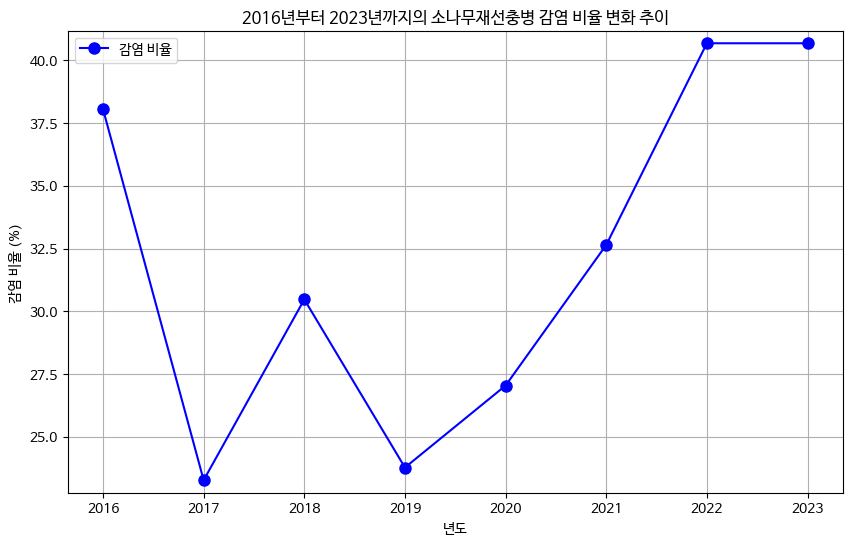

In [ ]:
import matplotlib.pyplot as plt

# Y축 범위 설정 (데이터 중심으로 조정)
y_min = min(infection_ratios) - 0.5
y_max = max(infection_ratios) + 0.5

plt.figure(figsize=(10, 6))
plt.plot(
    years,
    infection_ratios,
    marker='o',
    linestyle='-',
    color='b',
    label='감염 비율',
    markersize=8,  # 마커 크기 키움
)

# 그래프 제목과 라벨 설정
plt.title('2016년부터 2023년까지의 소나무재선충병 감염 비율 변화 추이')
plt.xlabel('년도')
plt.ylabel('감염 비율 (%)')

# Y축 범위를 조정
plt.ylim(y_min, y_max)

# 그래프 표시
plt.xticks(years)
plt.grid(True)
plt.legend()

# 그래프 출력
plt.show()
